<a href="https://colab.research.google.com/github/Vivek-Sajjan/Video_Classification/blob/main/M5_NB_MiniProject_02_Fare_Amount_Prediction_Using_Dask_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Implementation of Linear Regression on a Large Dataset Using Dask Library

## Learning Objectives

At the end of the mini-project, you will be able to :

- understand how dask handles large dataset over pandas dataframe
- perform exploratory data analysis on a large dataset (2 Million rows) using dask
- implement linear regression model using dask library and make predictions


## Problem Statement

 Predict the taxi fare amount in New York city using Dask-ML.

## Information

### Dask
[Dask](https://dask.pydata.org/en/latest/) is an open source project that gives abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

We can summarize the basics of Dask as follows:

* processes data that doesn’t fit into memory by breaking it into blocks and specifying task chains

* parallelizes execution of tasks across cores and even nodes of a cluster

* moves computation to the data rather than the other way around, to minimize communication overhead

### Dataset

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. Its variables are as follows:
![Dataset](https://cdn.exec.talentsprint.com/static/cds/NYC_Taxi_data_description_image.png)




Note that the features the ' Dask_MP_dataset.csv' file that is provided for this miniproject varies slightly in terms of included features, as compared to the original dataset described above. Please proceed with the provided csv file.

## Grading = 10 Points

In [ ]:
#@title Install Dask dependencies and restart runtime
!pip -qq install dask-ml
!pip -qq install dask
!pip -qq install dask[complete]
!pip install --upgrade --force-reinstall dask distributed
!pip -qq install mimesis
!pip install seaborn

#### Importing Necessary Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import dask
import dask.dataframe as dd
import dask.array as da
from dask_ml.linear_model import LinearRegression
from dask_ml.model_selection import train_test_split
from dask_ml.metrics import mean_squared_error, r2_score
from dask.distributed import Client
import time as time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from dask.distributed import Client, progress
client = Client()

2025-05-25 00:58:06,577 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 initialized by task ('shuffle-transfer-939e836143a6dc298cb9e01842928ad8', 0) executed on worker tcp://127.0.0.1:64178
2025-05-25 00:58:07,842 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 deactivated due to stimulus 'task-finished-1748114887.841643'
2025-05-25 00:58:17,457 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 initialized by task ('shuffle-transfer-939e836143a6dc298cb9e01842928ad8', 1) executed on worker tcp://127.0.0.1:64177
2025-05-25 00:58:17,699 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 deactivated due to stimulus 'task-finished-1748114897.6986492'


In [ ]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv

--2025-05-25 00:56:59--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231900522 (221M) [application/octet-stream]
Saving to: ‘Dask_MP_dataset.csv’

Dask_MP_dataset.csv 100%[===================>] 221.16M  8.90MB/s    in 21s     

2025-05-25 00:57:20 (10.6 MB/s) - ‘Dask_MP_dataset.csv’ saved [231900522/231900522]



#### Exercise 1: Read the dataset using dask library and compare the time of execution with pandas library. (1 Point)

**Hint:** pass `dtype` for passenger_count as `int64`

In [ ]:
DATASET_FILE = "Dask_MP_dataset.csv"

In [ ]:
%%time
df_dask = dd.read_csv(DATASET_FILE, dtype={"passenger_count": "int64"})

CPU times: user 4.48 ms, sys: 2.95 ms, total: 7.43 ms
Wall time: 6.26 ms


#### Use pandas to read the dataset and compare the time taken

In [ ]:
%%time
df_pandas = pd.read_csv(DATASET_FILE, dtype={"passenger_count": "int64"})

CPU times: user 1.24 s, sys: 235 ms, total: 1.47 s
Wall time: 1.46 s


In [ ]:
%%time
df_dask.head()

CPU times: user 20.2 ms, sys: 8.59 ms, total: 28.8 ms
Wall time: 524 ms


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
%%time
df_pandas.head()

CPU times: user 132 μs, sys: 18 μs, total: 150 μs
Wall time: 140 μs


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df_pandas.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df_dask.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

### Data Analysis



#### Exercise 2: Drop the unnecessary columns. Also drop the duplicate rows and the rows having null values. (1 Point)

**Hint:** Drop those columns which are not useful in EDA as well as model implementation

In [ ]:
dd_computed_before = df_dask.compute()

In [ ]:
print("Before processing")
print("Shape:", dd_computed_before.shape)
print("Number of duplicates:", dd_computed_before.duplicated().sum())
print("Number of null values:", dd_computed_before.isnull().sum().sum())
print("Columns:", dd_computed_before.columns)

Before processing
Shape: (2000000, 9)
Number of duplicates: 0
Number of null values: 28
Columns: Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
""" Drop unnecessary columns """
df_dask = df_dask.drop(["Unnamed: 0", "key"], axis=1)

In [ ]:
""" Drop duplicate rows """
df_dask = df_dask.drop_duplicates()

In [ ]:
""" drop NA rows """
df_dask = df_dask.dropna()

In [ ]:
dd_computed_after = df_dask.compute()

In [ ]:
print("After processing")
print("Shape:", dd_computed_after.shape)
print("Number of duplicates:", dd_computed_after.duplicated().sum())
print("Number of null values:", dd_computed_after.isnull().sum().sum())
print("Columns:", dd_computed_after.columns)

After processing
Shape: (1999983, 7)
Number of duplicates: 0
Number of null values: 0
Columns: Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


#### Exercise 3: Visualize the target variable, i.e., `fare_amount` to study the fare distribution, using a histogram density plot. Analyze the fare_amount distribution, try to visualize it for a range of [0, 60]. (1 Point)

**Hint:** [sns.hisplot()](https://stackoverflow.com/questions/51027636/seaborn-histogram-with-bigdata/51027895) and use `.between` to plot the graph for given range


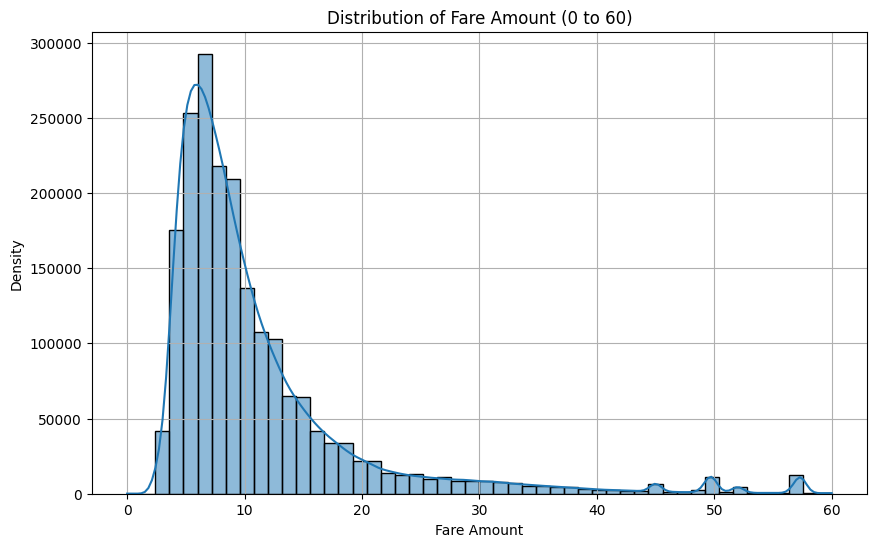

In [ ]:
""" explore and plot the density plot of fare_amount """
df_filtered = df_dask[df_dask["fare_amount"].between(0, 60)].compute()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["fare_amount"], kde=True, bins=50)
plt.title("Distribution of Fare Amount (0 to 60)")
plt.xlabel("Fare Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()

#### Observe the number of workers and cores running in your machine

Initialize a client and observe how many workers are working and the number of cores utilizing for the given data set.

In [ ]:
""" Initialize a client """
client = Client()
print(client)

<Client: 'tcp://127.0.0.1:64436' processes=4 threads=12, memory=48.00 GiB>


2025-05-25 00:58:31,790 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 initialized by task ('shuffle-transfer-939e836143a6dc298cb9e01842928ad8', 2) executed on worker tcp://127.0.0.1:64447
2025-05-25 00:58:32,634 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 deactivated due to stimulus 'task-finished-1748114912.6335318'
2025-05-25 00:58:55,570 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 initialized by task ('shuffle-transfer-939e836143a6dc298cb9e01842928ad8', 1) executed on worker tcp://127.0.0.1:64450
2025-05-25 00:58:55,794 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 deactivated due to stimulus 'task-finished-1748114935.7936609'
2025-05-25 00:59:02,459 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 939e836143a6dc298cb9e01842928ad8 initialized by task ('shuffle-transfer-939e836143a6dc

### EDA based on Time

#### Exercise 4: Extract day of the week (dow), hour, month and year from `pickup_datetime`. (1 Point)

**Hint:** use `pd.to_datetime()` function as dask does not have this functionality in it.

Remember to use `.compute()` while passing the dask dataframe in defined function.

In [ ]:
df_pd = df_dask[["pickup_datetime"]].compute()
df_pd["pickup_datetime"] = pd.to_datetime(df_pd.pickup_datetime)
df_pd["pickup_year"] = df_pd.pickup_datetime.dt.year
df_pd["pickup_month"] = df_pd.pickup_datetime.dt.month
df_pd["pickup_hour"] = df_pd.pickup_datetime.dt.hour
df_pd["pickup_dow"] = df_pd.pickup_datetime.dt.day_of_week
df_pd["pickup_dow_name"] = df_pd.pickup_datetime.dt.day_name()

df_pd.head()

,pickup_datetime,pickup_year,pickup_month,pickup_hour,pickup_dow,pickup_dow_name
2,2011-08-18 00:35:00+00:00,2011,8,0,3,Thursday
3,2012-04-21 04:30:42+00:00,2012,4,4,5,Saturday
6,2012-11-20 20:35:00+00:00,2012,11,20,1,Tuesday
10,2012-04-08 07:30:50+00:00,2012,4,7,6,Sunday
13,2013-07-02 19:54:00+00:00,2013,7,19,1,Tuesday


#### Exercise 5: a.) Plot the taxi trip by hour of the day  (0.5 Points)

* Partition the data into segments using `dask.from_pandas()`

* Plot the taxi trip for hour of the day. **Hint:** [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [ ]:
df_partitioned = dd.from_pandas(df_pd, npartitions=4)

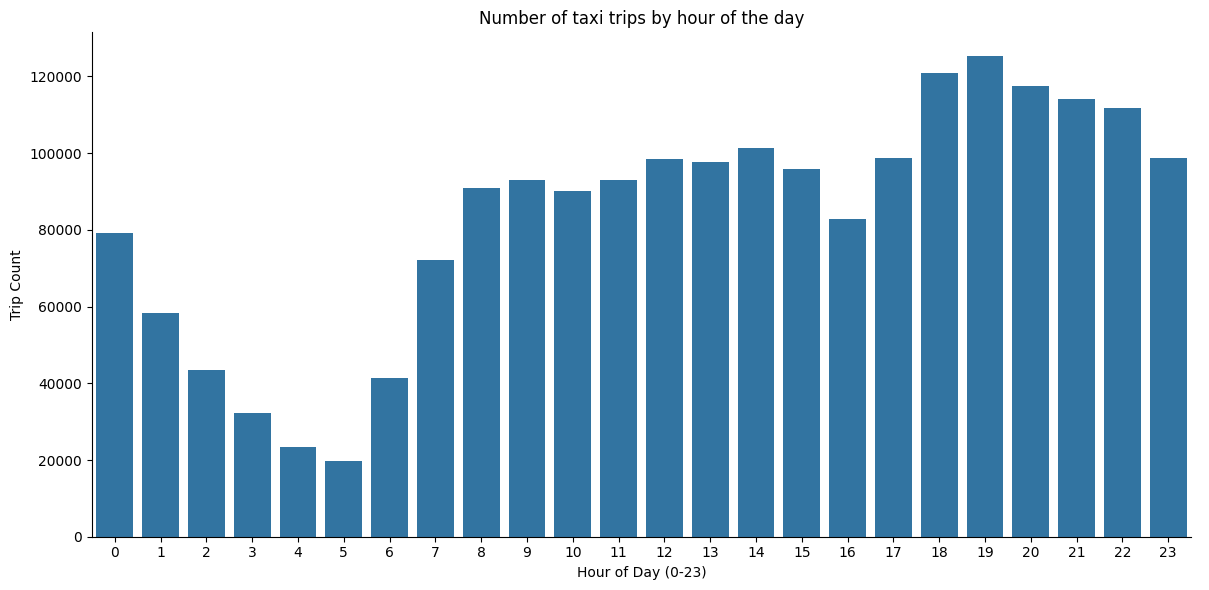

In [ ]:
""" taxi trip repartition by hour of the day """
sns.catplot(data=df_partitioned.compute(), x="pickup_hour", kind="count", height=6, aspect=2)
plt.title("Number of taxi trips by hour of the day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()

#### Exercise 5: b.) Plot the taxi trip repartition by day of the week (dow) (0.5 Points)

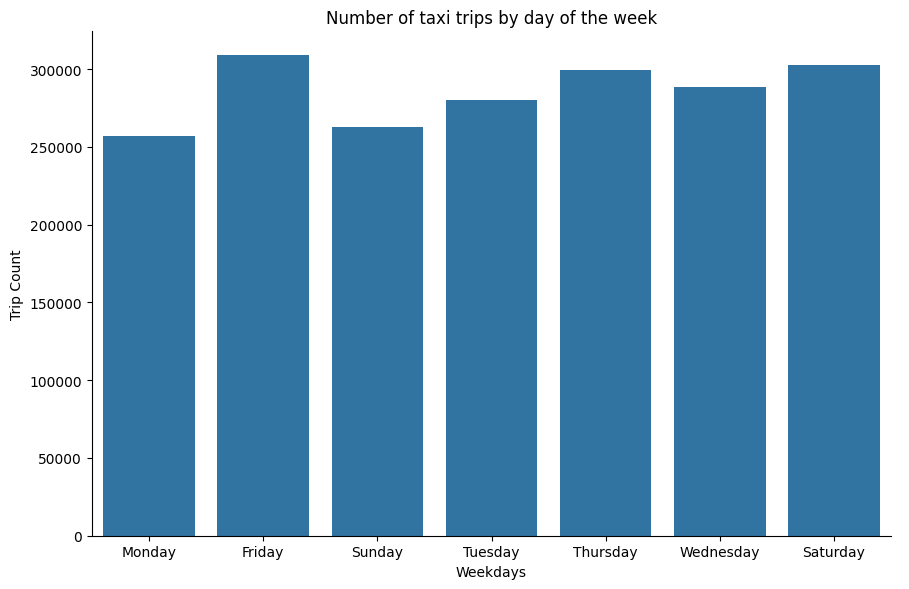

In [ ]:
""" taxi trip repartition by day of the week """
sns.catplot(data=df_partitioned.compute(), x="pickup_dow_name", kind="count", height=6, aspect=1.5)
plt.title("Number of taxi trips by day of the week")
plt.xlabel("Weekdays")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()

#### Exercise 6: a.) Draw a plot between the target variable and passenger count and analyze it.  (0.5 Points)

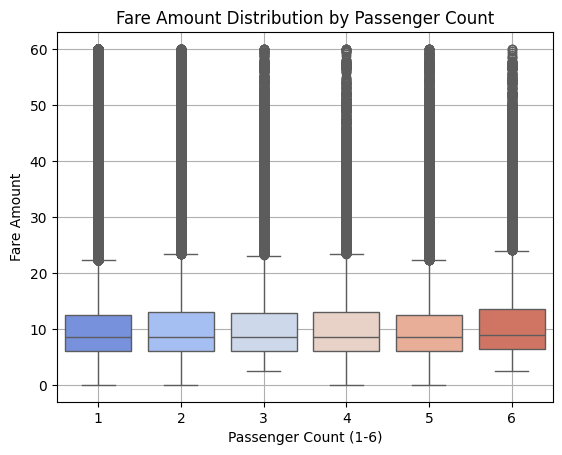

In [ ]:
""" passenger count feature """
df_1 = df_dask[["fare_amount", "passenger_count"]]
df_1 = df_1[(df_1["passenger_count"] > 0) & (df_1["passenger_count"] <= 6) & (df_1["fare_amount"].between(0, 60))]

sns.boxplot(data=df_1.compute(), x="passenger_count", y="fare_amount", palette="coolwarm")
plt.title("Fare Amount Distribution by Passenger Count")
plt.xlabel("Passenger Count (1-6)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()

#### Exercise 6: b.) Draw a plot between the target variable and hour and analyze it. (0.5 Points)

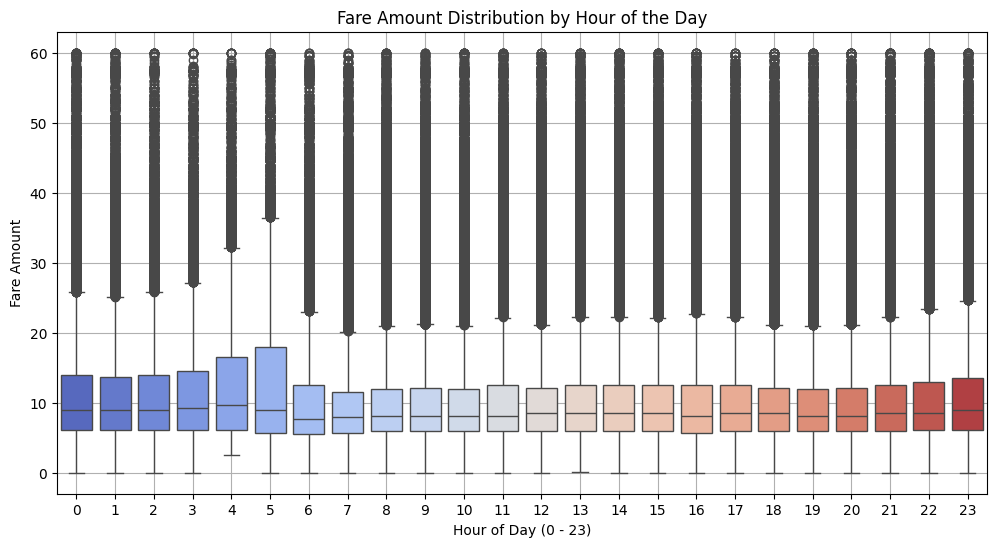

In [ ]:
""" fare amount by hour """
df_2 = df_dask[["fare_amount", "pickup_datetime"]].compute()
df_2["pickup_hour"] = pd.to_datetime(df_2.pickup_datetime).dt.hour
df_2 = df_2[df_2["fare_amount"].between(0, 60)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2, x="pickup_hour", y="fare_amount", palette="coolwarm")
plt.title("Fare Amount Distribution by Hour of the Day")
plt.xlabel("Hour of Day (0 - 23)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()

### Feature Engineering

#### Exercise 7: Compute the Haversine distance between pickup and dropoff point. (1 Point)

* Convert the latitude and longitude co-rodinates to radians

* Calculate the Haversine distance

  **Hint:** [haversine_distances](https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4)

* Add the "distance" feature to the dataset and plot its distribution

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [ ]:
""" distance feature """
df_dist = df_dask.compute()
df_dist["distance"] = haversine_distance(
    df_dist["pickup_latitude"],
    df_dist["pickup_longitude"],
    df_dist["dropoff_latitude"],
    df_dist["dropoff_longitude"])
df_dist.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.39
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.80
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,1.56
10,5.3,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1,1.37
13,7.0,2013-07-02 19:54:00 UTC,-74.005360,40.728867,-74.008913,40.710907,1,2.02


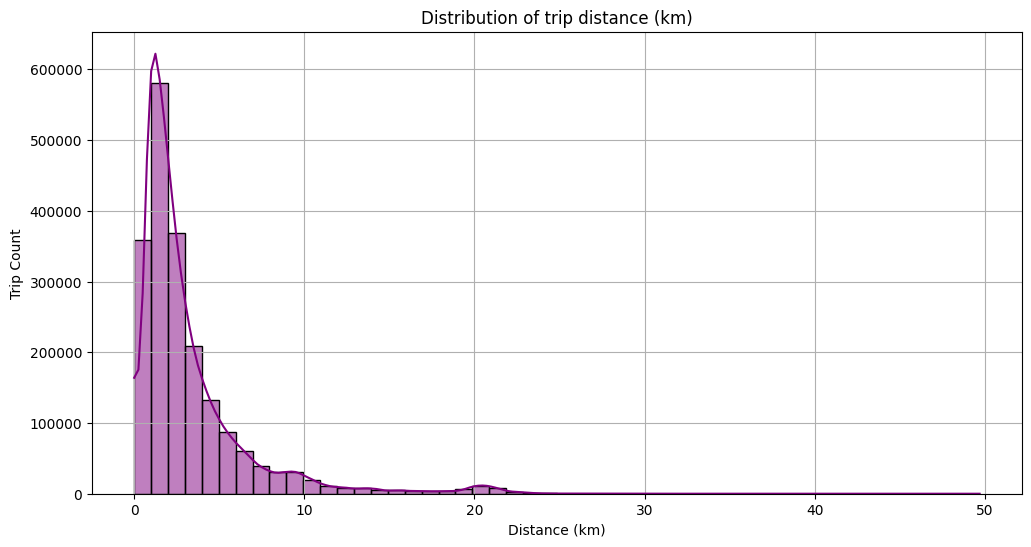

In [ ]:
""" plot the distance feature (take distance < 50) """
df_dist = df_dist[df_dist["distance"] < 50]

plt.figure(figsize=(12, 6))
sns.histplot(df_dist["distance"], bins=50, kde=True, color="purple")
plt.title("Distribution of trip distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Trip Count")
plt.grid(True)
plt.show()

### Show the plot between distance and fare amount

**Hint:** [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

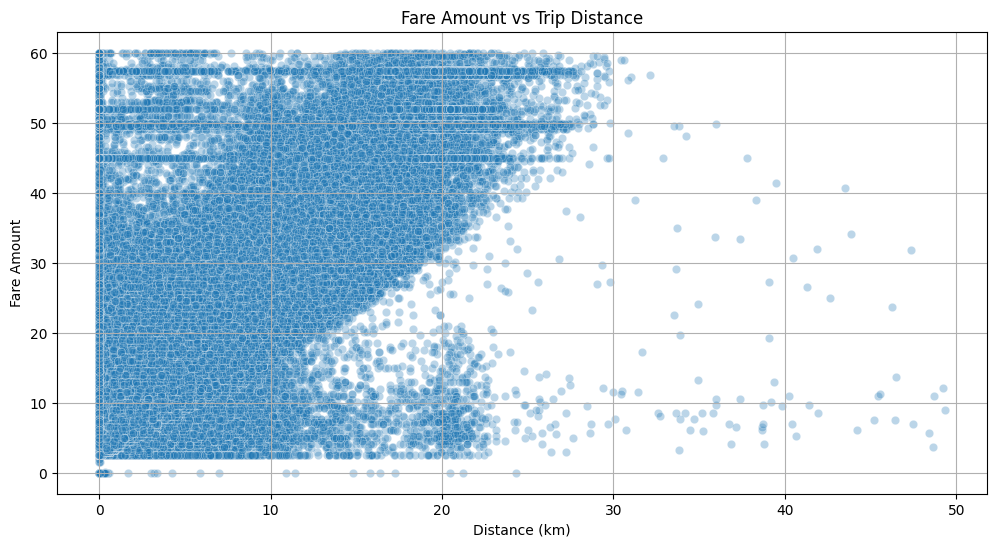

In [ ]:
""" correlation between fare_amount and distance """
df_plot = df_dask[["fare_amount", "distance"]].compute()
df_plot = df_plot[
    (df_plot["fare_amount"].between(0, 60)) &
    (df_plot["distance"].between(0, 50))
]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_plot, x="distance", y="fare_amount", alpha=0.3)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()

### Preparing dataset for model implementation

**Note:** Use the above modified dataset for modelling.

In [ ]:
df_pd = df_dask.compute()
df_pd["pickup_datetime"] = pd.to_datetime(df_pd.pickup_datetime)
df_pd["pickup_hour"] = df_pd.pickup_datetime.dt.hour
df_pd["pickup_dow"] = df_pd.pickup_datetime.dt.day_of_week
df_pd["distance"] = haversine_distance(
    df_pd["pickup_latitude"],
    df_pd["pickup_longitude"],
    df_pd["dropoff_latitude"],
    df_pd["dropoff_longitude"])

df_dask = dd.from_pandas(df_pd, npartitions=4)
df_dask.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_dow,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0,1.03
0,7.7,2009-05-29 18:58:00+00:00,-74.006425,40.744747,-73.981225,40.769387,3,18,4,3.47
0,91.0,2014-09-21 10:02:20+00:00,-74.009455,40.724818,-73.965932,40.638384,1,10,6,10.29
1,5.0,2012-10-05 02:47:00+00:00,-73.942057,40.817467,-73.940715,40.824472,1,2,4,0.79
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,8.45


In [ ]:
df = df_dask.copy()
df = df[
    (df["fare_amount"].between(1, 60)) &
    (df["distance"].between(1, 30))
]

# Drop rows where fare is suspiciously low for a long distance
# df = df[~((df["distance"] > 10) & (df["fare_amount"] < 10))]
df.npartitions

4

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_dow,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0,1.03
0,7.7,2009-05-29 18:58:00+00:00,-74.006425,40.744747,-73.981225,40.769387,3,18,4,3.47
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,1.39
2,18.0,2013-03-13 09:54:00+00:00,-73.986282,40.726550,-73.993290,40.762912,1,9,2,4.09


### Removing outliers from training set Based on Coordinates

#### Exercise 8: Remove the outliers using the given latitude and longitude features from the dataset. We need to analyze the data of taxi within New York City. (1 Point)

**Hint:** Given the co-ordinates of New York city are Latitude: 40.7128° and Longitude: -74.0060°. You can include the pickup and drop off points such that there left and right value mean will be the given co-ordinate value.

Also, choose nearest extreme values.

Use `.between()` and pass left and right value attributes accordingly.

In [ ]:
""" remove the outliers in pickup latitude longitude and drop off latitude and longitude """
# (left + right)/2 = 40.7128 = latitude
# (left + right)/2 = -74.0060 = longitude

latitude = 40.7128
longitude = -74.0060

# use a delta value to define a spartial region
delta_lat = 0.2
delta_lon = 0.25

# Latitude bounds such that mean = 40.7128
lat_left = latitude - delta_lat
lat_right = latitude + delta_lat

# Longitude bounds such that mean = -74.0060
lon_left = longitude - delta_lon
lon_right = longitude + delta_lon

df = df[
    df['pickup_latitude'].between(lat_left, lat_right) &
    df['pickup_longitude'].between(lon_left, lon_right) &
    df['dropoff_latitude'].between(lat_left, lat_right) &
    df['dropoff_longitude'].between(lon_left, lon_right)
]

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_dow,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,0,1.03
0,7.7,2009-05-29 18:58:00+00:00,-74.006425,40.744747,-73.981225,40.769387,3,18,4,3.47
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,1.39
2,18.0,2013-03-13 09:54:00+00:00,-73.986282,40.726550,-73.993290,40.762912,1,9,2,4.09


### Modelling

#### Exercise 9: Divide the data into train and test splits with X as feature variables and y as target variable  (1 Point)

* Divide data into train test split with 70-30 ratio, Hint: `train_test_split()`

* As dask functions operate lazily so, before calling `.fit()` function, call the dask dataframe with `.compute()`.
* Convert X_train and y_train into array using `.values` as [dask's](https://ml.dask.org/modules/api.html) `.fit()` function takes array as attribute

In [ ]:
""" select the target and feature variables and split the data into train and test """
X = df[["passenger_count", "distance", "pickup_hour", "pickup_dow"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Exercise 10: Predict the test data and calculate the mean squared error and r2 score. (1 Point)

**Hint:** Remember to call `.compute()` function as dask functions operate lazily and convert the dask dataframe to `.values` (Array type) as suggested in above exercise

In [ ]:
""" predict the values """
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

lr = LinearRegression()
lr.fit(X_train_array, y_train_array)

y_pred = lr.predict(X_test_array)

# Convert to NumPy arrays and handle NaNs
y_test_np = y_test_array.compute()
y_pred_np = y_pred.compute()

# Remove NaNs from both arrays
mask = np.isfinite(y_test_np) & np.isfinite(y_pred_np)
y_test_np = y_test_np[mask]
y_pred_np = y_pred_np[mask]

In [ ]:
from sklearn.metrics import mean_squared_error as mean_squared_error_1
from sklearn.metrics import r2_score as r2_score_1

In [ ]:
""" compute mean squared error and r2_score """
mse = mean_squared_error_1(y_test_np, y_pred_np)
r2 = r2_score_1(y_test_np, y_pred_np)
# mse = mean_squared_error(y_test_array, y_pred)
# r2 = r2_score(y_test_np, y_pred_np)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 14.539881045527029
R2 Score: 0.8235378179735295


### Report Analysis
* Discuss the pros and cons of using dask
* Derive the insights and discuss
* Comment on the performance metrics (MSE, $R^2$ score)
